In [28]:
#%matplotlib ipympl 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import matplotlib.colors as mcolors
import os

# Define file path and chunk size     10^9 times generated background
file_path = '/tmp/icpy/icpy/Hist_all_10y.csv'

chunk_size = 10**5  # Adjust based on available memory
# Define different bin sizes for declination and hat_ts
# Non-uniform bin edges for declination, with exactly 10,000 bins
dec_edges = np.linspace(-81, 81, 200)  # Creating 10,001 points to make 10,000 bins

# Custom non-uniform bin edges for hat_ts with total of 10,000 bins
# Allocate more bins to the range 0-2 and 9-35
hat_ts_edges = np.linspace(0, 35, 200)  
# Initialize variables to accumulate histogram data
histogram_2d = None



# Initialize variables to accumulate histogram data
histogram_2d = None
x_edges = None
y_edges = None

In [27]:

for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    dec = chunk['dec']
    hat_ts = chunk['hat_ts']
    
    # Compute 2D historam for the current chunk using custom edges
    hist, x_edges, y_edges = np.histogram2d(dec, hat_ts, bins=[dec_edges, hat_ts_edges], density = True)
    
    # Accumulate histogram data
    if histogram_2d is None:
        histogram_2d = hist
    else:
        histogram_2d += hist

# Save directory and ensure it exists
save_dir = '/tmp/icpy/icpy'
os.makedirs(save_dir, exist_ok=True)
np.savez(os.path.join(save_dir, 'histogram_data_variable_bins_200_ts_density.npz'), histogram_2d=histogram_2d, x_edges=x_edges, y_edges=y_edges)

KeyboardInterrupt: 

In [29]:
datapick = 6

# Initialize the filename variable
filename = ''

if datapick == 1:
    filename = '/tmp/icpy/icpy/histogram_data_10000.npz'  # 10000 x 10000
elif datapick == 2:
    filename = '/tmp/icpy/icpy/histogram_data_100_bins.npz'  # 100 bins
elif datapick == 3:
    filename = '/tmp/icpy/icpy/histogram_data_162_bins.npz'  # 162 bins
elif datapick == 4:
    filename = '/tmp/icpy/icpy/histogram_data_162x35y_bins.npz'  # 162 x 35 bins
elif datapick == 5:
    filename = '/tmp/icpy/icpy/histogram_data_10000_bins_max35ts.npz'  # 10000 x 10000 bins max 35 ts 
elif datapick == 6:
    filename = '/tmp/icpy/icpy/histogram_data_1000_bins.npz'  # 9720 x 3500 bins
elif datapick == 7:
    filename = '/tmp/icpy/icpy/histogram_data_variable_bins_10000_ts.npz'  # 9720 x 3500 bins
elif datapick == 8:
    filename = '/tmp/icpy/icpy/histogram_data_variable_bins_1000_ts.npz'  # 9720 x 3500 bins
elif datapick == 9:
    filename = '/tmp/icpy/icpy/histogram_data_variable_bins_200_ts_density.npz'  # 9720 x 3500 bins
else: # choose 0 

    filename = '/tmp/icpy/icpy/histogram_data_9720x3500y_bins.npz'  # 9720 x 3500 bins
# Load the data from the determined filename
data = np.load(filename)

# Print the datapick and the filename
print(f"Data pick = {datapick}")
print(f"Loading file: {filename}")

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']




# Define the directory where you want to save the plots
save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

def save_plot(fig, ax, datapick):
    """
    Save the given figure to the specified directory, using the title as the filename.
    The filename will include the number of bins based on the datapick value.

    Parameters:
    - fig: The matplotlib figure object to be saved.
    - ax: The matplotlib axes object where the plot is drawn.
    - datapick: The datapick value used to select the dataset.
    """
    # Define the bins based on the datapick
    bins_mapping = {
        1: '10000',
        2: '100',
        3: '162',
        4: '162x35y',
        5: '10000_max35ts',
        6: '1000',
        7: 'variable_10000_ts',
        8: 'variable_1000_ts',
        0: '9720x3500y'
    }
    
    bins = bins_mapping.get(datapick, 'unknown')
    
    # Extract the title from the plot
    title = ax.get_title()
    
    # Create a valid filename from the title
    # Replace spaces and special characters with underscores
    filename = f"{title.replace(' ', '_').replace('/', '_')}_bins_{bins}.png"
    
    # Full path for the file
    filepath = os.path.join(save_dir, filename)
    
    # Save the plot
    fig.savefig(filepath)
    print(f"Plot saved as {filepath}")

Data pick = 6
Loading file: /tmp/icpy/icpy/histogram_data_1000_bins.npz


In [30]:
# Verify the data
print(histogram_2d)
print(x_edges)
print(y_edges)
print(f"Histogram 2D Shape: {histogram_2d.shape}")
print(f"X edges (Declination): {x_edges[0]} to {x_edges[-1]}")
print(f"Y edges (Hat_TS): {y_edges[0]} to {y_edges[-1]}")
print(f"Histogram Data Sum: {np.sum(histogram_2d)}")

# Print the contents of the file
print("Contents of the .npz file:")
for key in data.files:
    print(f"Key: {key}")
    print(f"Shape: {data[key].shape}")
    print(f"Data:\n{data[key]}\n")

# Define the directory where you want to save the plots
save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

def save_plot(fig, ax):
    """
    Save the given figure to the specified directory, using the title as the filename.

    Parameters:
    - fig: The matplotlib figure object to be saved.
    - ax: The matplotlib axes object where the plot is drawn.
    """
    # Extract the title from the plot
    title = ax.get_title()
    
    # Create a valid filename from the title
    # Replace spaces and special characters with underscores
    filename = title.replace(' ', '_').replace('/', '_') + '.png'
    
    # Full path for the file
    filepath = os.path.join(save_dir, filename)
    
    # Save the plot
    fig.savefig(filepath)
    print(f"Plot saved as {filepath}")

[[ 41677.    815.    858. ...      0.      0.      0.]
 [ 43503.    870.    878. ...      0.      0.      0.]
 [ 45868.    836.    773. ...      0.      0.      0.]
 ...
 [157893.   4257.   4239. ...      0.      0.      0.]
 [163903.   4355.   4260. ...      0.      0.      0.]
 [167084.   4291.   3949. ...      0.      0.      0.]]
[-81.    -80.838 -80.676 ...  80.676  80.838  81.   ]
[ 0.     0.035  0.07  ... 34.93  34.965 35.   ]
Histogram 2D Shape: (1000, 1000)
X edges (Declination): -81.0 to 81.0
Y edges (Hat_TS): 0.0 to 35.0
Histogram Data Sum: 232482600.0
Contents of the .npz file:
Key: histogram_2d
Shape: (1000, 1000)
Data:
[[ 41677.    815.    858. ...      0.      0.      0.]
 [ 43503.    870.    878. ...      0.      0.      0.]
 [ 45868.    836.    773. ...      0.      0.      0.]
 ...
 [157893.   4257.   4239. ...      0.      0.      0.]
 [163903.   4355.   4260. ...      0.      0.      0.]
 [167084.   4291.   3949. ...      0.      0.      0.]]

Key: x_edges
Shape: (1

In [31]:
print(y_edges)

[ 0.     0.035  0.07  ... 34.93  34.965 35.   ]


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming histogram_2d, x_edges, y_edges are already defined
# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']
# Check if histogram_2d is defined and has the correct dimensions
if 'histogram_2d' in locals() and histogram_2d.ndim == 2:
    # Compute the sum of counts for each declination bin
    sum_dec_counts = np.sum(histogram_2d, axis=1)

    # Normalize histogram_2d by the sum of counts for each declination bin
    # Vectorized operation instead of a loop
    normalized_histogram_2d = np.divide(histogram_2d, sum_dec_counts[:, None], where=sum_dec_counts[:, None] != 0)

    # Determine the threshold value on the x-axis (Hat_TS)
    threshold_hat_ts = 8

    # Find the index of the bin where Hat_TS crosses the threshold
    bin_index_for_threshold = np.digitize(threshold_hat_ts, x_edges) - 1

    # Print the corresponding declination
    if 0 <= bin_index_for_threshold < len(x_edges) - 1:
        print(f"Bin index for Hat_TS threshold ({threshold_hat_ts}): {bin_index_for_threshold}")
        print(f"Corresponding declination value: {x_edges[bin_index_for_threshold]}")
    else:
        print("Threshold value is out of x_edges range.")

    # Find the first declination bin where the normalized count in the relevant x-axis bin exceeds the threshold
    highlight_bin = None
    highlight_declination = None

    if 0 <= bin_index_for_threshold < len(x_edges) - 1:
        highlight_bins = np.where(normalized_histogram_2d[:, bin_index_for_threshold] > 0)[0]
        if len(highlight_bins) > 0:
            highlight_bin = highlight_bins[0]
            highlight_declination = x_edges[highlight_bin]

    # Find max and min normalized counts using vectorized operations
    counts_at_threshold = normalized_histogram_2d[:, bin_index_for_threshold]
    max_bin_index = np.argmax(counts_at_threshold)
    max_normalized_count = counts_at_threshold[max_bin_index]
    positive_counts_at_threshold = counts_at_threshold[counts_at_threshold > 0]
    min_bin_index = np.argmin(positive_counts_at_threshold)
    min_normalized_count = positive_counts_at_threshold[min_bin_index] if len(positive_counts_at_threshold) > 0 else np.inf

    # Print the highlighted bins and their declinations
    print(f"Maximum normalized count bin index: {max_bin_index}")
    if max_bin_index is not None:
        print(f"Maximum highlighted declination: {x_edges[max_bin_index]}")

    print(f"Minimum normalized count bin index: {min_bin_index}")
    if min_bin_index is not None:
        print(f"Minimum highlighted declination: {x_edges[min_bin_index]}")
else:
    print("histogram_2d is not defined or is not a 2D array.")

Bin index for Hat_TS threshold (8): 549
Corresponding declination value: 7.938000000000002
Maximum normalized count bin index: 40
Maximum highlighted declination: -74.52
Minimum normalized count bin index: 6
Minimum highlighted declination: -80.028


In [8]:
#DANGER!!!

# Plot the normalized histogram with a logarithmic scale
plt.figure(figsize=(12, 7))

# Lists to hold labels for the legend
legend_labels = []

# Plot the highlighted line for the specific declination if found
if highlight_bin is not None:
    plt.plot(y_edges[:-1], normalized_histogram_2d[highlight_bin, :], color='red', linewidth=2.5, label=f'Dec = {highlight_declination} that crosses Zero')
    legend_labels.append(f'Dec {highlight_declination}')
    print(f"Highlighted line plotted for declination {highlight_declination}")

# Plot the highlighted maximum and minimum lines
if max_bin_index is not None:
    plt.plot(y_edges[:-1], normalized_histogram_2d[max_bin_index, :], color='green', linewidth=2.C5, label=f'Max Dec {x_edges[max_bin_index]}')
    legend_labels.append(f'Max Dec {x_edges[max_bin_index]}')

if min_bin_index is not None:
    plt.plot(y_edges[:-1], normalized_histogram_2d[min_bin_index, :], color='black', linewidth=2.5, label=f'Min Dec {x_edges[min_bin_index]}')
    legend_labels.append(f'Min Dec {x_edges[min_bin_index]}')

# Plot the other lines but do not add labels for them
for i in range(len(x_edges) - 1):
    if i != max_bin_index and i != min_bin_index:
        plt.plot(y_edges[:-1], normalized_histogram_2d[i, :], alpha=0.2)

SyntaxError: invalid decimal literal (2984819495.py, line 17)

In [33]:
# Add a vertical line for emphasis at the threshold if needed
plt.axvline(x=threshold_hat_ts, color='blue', linestyle='--', label='Hat_TS Threshold')
legend_labels.append(f'TS Threshold = {threshold_hat_ts}')

# Set the legend with only the specified labels
plt.xlabel('Hat_TS')
plt.ylabel('Normalized Count (log scale)')
plt.title('Normalized Histogram of Hat_TS Values by Declination (Log Scale)')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.legend(legend_labels)  # Show legend with specific labels
fig = plt.gcf()  # Get the current figure
ax = plt.gca()   # Get the current axes

# Save the plot
plt.savefig('normalized_histogram.png')
plt.show()


NameError: name 'legend_labels' is not defined

In [17]:
# # Assuming histogram_2d, x_edges, y_edges, max_bin_index, and min_bin_index are defined
# data = np.load('/tmp/icpy/icpy/histogram_data_100_bins.npz')  # Adjust the file path if necessary

# histogram_2d = data['histogram_2d']
# x_edges = data['x_edges']
# y_edges = data['y_edges']

# sin_x_edges = np.sin(np.radians(x_edges))

# plt.figure(figsize=(10, 8))
# plt.imshow(np.log1p(histogram_2d.T), origin='lower', aspect='auto',
#            extent=[sin_x_edges[0], sin_x_edges[-1], y_edges[0], y_edges[-1]])
# plt.colorbar(label='Log-scaled Counts')
# plt.xlabel('sin(Declination)')
# plt.ylabel('Hat_TS')
# plt.title('2D Histogram of sin(Declination) vs Hat_TS')
# plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=1, label='-5°')
# plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=1, label='-10°')
# plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=1, label='+10°')
# plt.legend()
# fig = plt.gcf()  # Get the current figure
# ax = plt.gca()   # Get the current axes

# # Save the plot
# save_plot(fig, ax)
# plt.show()
# plt.show()

Histogram 2D Shape: (1000, 1000)
X edges (Declination): -81.0 to 81.0
Y edges (Hat_TS): 0.0 to 35.0
Histogram Data Sum: 232482600.0
Transformed X edges (sin(Declination)): -0.9876883405951378 to 0.9876883405951378
Log-transformed histogram data range:  0.0 to 12.822611422769967
99th percentile value for log-transformed data:  7.780720886117918
Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/2D_Histogram_of_sin(Declination)_vs_TS.png


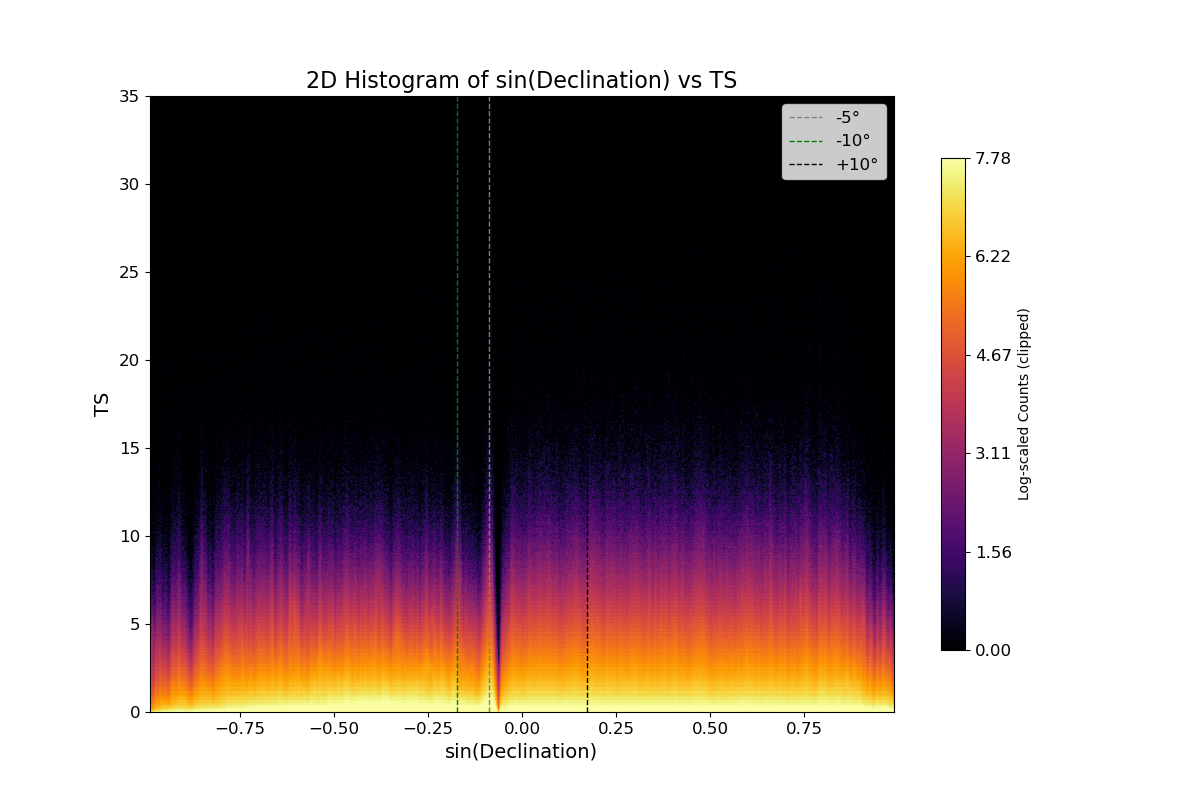

In [34]:
import numpy as np
import matplotlib.pyplot as plt


# Load the .npz file
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Verify the data
print("Histogram 2D Shape:", histogram_2d.shape)
print("X edges (Declination):", x_edges[0], "to", x_edges[-1])
print("Y edges (Hat_TS):", y_edges[0], "to", y_edges[-1])
print("Histogram Data Sum:", np.sum(histogram_2d))

# Apply sine transformation to x_edges
sin_x_edges = np.sin(np.radians(x_edges))

# Verify transformed x_edges
print("Transformed X edges (sin(Declination)):", sin_x_edges[0], "to", sin_x_edges[-1])

# Log-transform the histogram data
log_histogram_2d = np.log1p(histogram_2d.T)
print("Log-transformed histogram data range: ", np.min(log_histogram_2d), "to", np.max(log_histogram_2d))

# Determine appropriate clipping threshold based on data
percentile_99 = np.percentile(log_histogram_2d, 99)  # Corrected to use numerical value 99
print("99th percentile value for log-transformed data: ", percentile_99)

# Set the clipping threshold to handle high-density areas
clipped_log_histogram_2d = np.clip(log_histogram_2d, 0, percentile_99)

# Plotting with adjusted parameters for better visualization
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(clipped_log_histogram_2d, origin='lower', aspect='auto',
               extent=[sin_x_edges[0], sin_x_edges[-1], y_edges[0], y_edges[-1]],
               cmap='inferno')  # Using a different colormap for better contrast

# Add color bar with log counts and formatted numbers, and adjust its size
cbar = plt.colorbar(im, ax=ax, label='Log-scaled Counts (clipped)', shrink=0.8)  # Adjust the shrink parameter to reduce the color bar size
cbar.ax.tick_params(labelsize=12)  # Adjust color bar tick labels

# Label the color bar with numerical values
cbar.set_ticks(np.linspace(0, percentile_99, num=6))
cbar.set_ticklabels([f'{v:.2f}' for v in np.linspace(0, percentile_99, num=6)])
# Set labels and title with adjusted font sizes
ax.set_xlabel('sin(Declination)', fontsize=14)
ax.set_ylabel('TS', fontsize=14)
ax.set_title('2D Histogram of sin(Declination) vs TS', fontsize=16)

# Customize tick marks
ax.tick_params(axis='both', which='major', labelsize=12)

# Add vertical lines with labels
ax.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=1, label='-5°')
ax.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=1, label='-10°')
ax.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=1, label='+10°')
ax.legend(fontsize=12)  # Adjust legend font size

# Save the plot using the custom function
save_plot(fig, ax)

# Display the plot
plt.show()






Histogram 2D Shape: (1000, 1000)
X edges (Declination): -81.0 to 81.0
Y edges (Hat_TS): 0.0 to 35.0
Histogram Data Sum: 232482600.0
Transformed X edges (sin(Declination)): -0.9876883405951378 to 0.9876883405951378
Log-transformed histogram data range:  0.0 to 12.822611422769967
Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/3D_Histogram_of_sin(Declination)_vs_Hat_TS.png


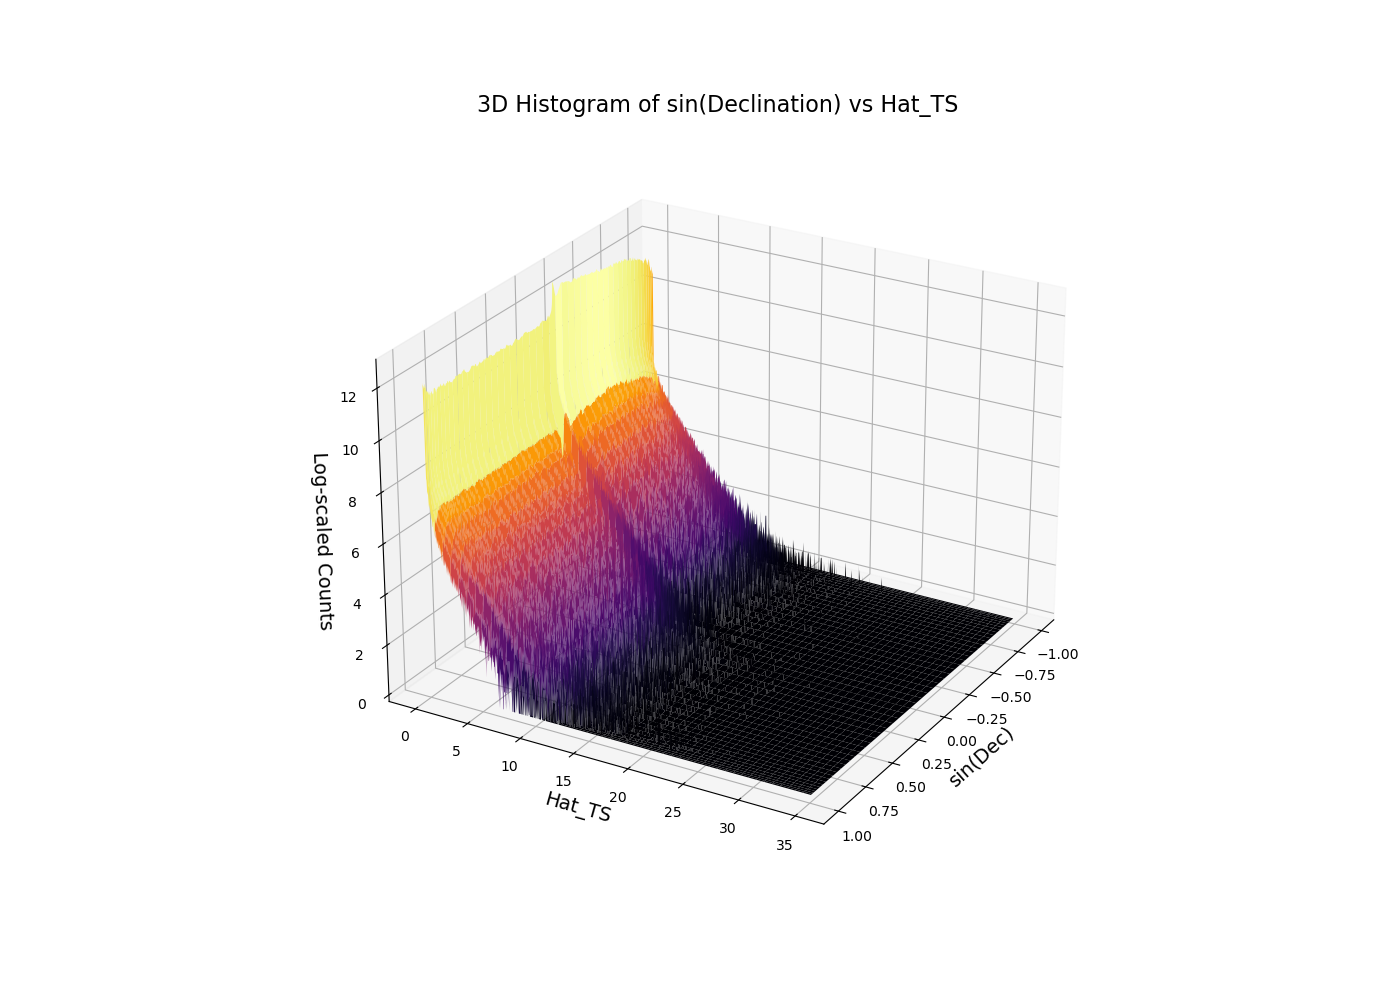

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the .npz file

histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Verify the data
print("Histogram 2D Shape:", histogram_2d.shape)
print("X edges (Declination):", x_edges[0], "to", x_edges[-1])
print("Y edges (Hat_TS):", y_edges[0], "to", y_edges[-1])
print("Histogram Data Sum:", np.sum(histogram_2d))

# Apply sine transformation to x_edges
sin_x_edges = np.sin(np.radians(x_edges))

# Verify transformed x_edges
print("Transformed X edges (sin(Declination)):", sin_x_edges[0], "to", sin_x_edges[-1])

# Log-transform the histogram data
log_histogram_2d = np.log1p(histogram_2d)
print("Log-transformed histogram data range: ", np.min(log_histogram_2d), "to", np.max(log_histogram_2d))



# Create a 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Adjust the viewing angle
ax.view_init(elev=25, azim=30)

# Create a meshgrid for plotting
X, Y = np.meshgrid(sin_x_edges[:-1], y_edges[:-1])

# Plot the surface
surf = ax.plot_surface(X, Y, log_histogram_2d.T, cmap='inferno', edgecolor='none')

# Labels and title with increased font sizes
ax.set_xlabel('sin(Dec)', fontsize=14)
ax.set_ylabel('Hat_TS', fontsize=14)
ax.set_zlabel('Log-scaled Counts', fontsize=14)
ax.set_title('3D Histogram of sin(Declination) vs Hat_TS', fontsize=16)

# Customize tick marks
ax.tick_params(axis='both', which='major', labelsize=10)

# Save the plot using the custom function
save_plot(fig, ax)

# Show the plot
plt.show()

Histogram 2D Shape: (199, 199)
X edges (Declination): -81.0 to 81.0
Y edges (Hat_TS): 0.0 to 35.0
Histogram Data Sum: 16238.505291005287
Transformed X edges (sin(Declination)): -0.9876883405951378 to 0.9876883405951378
Log-transformed histogram data range:  0.0 to 4.752668925648496


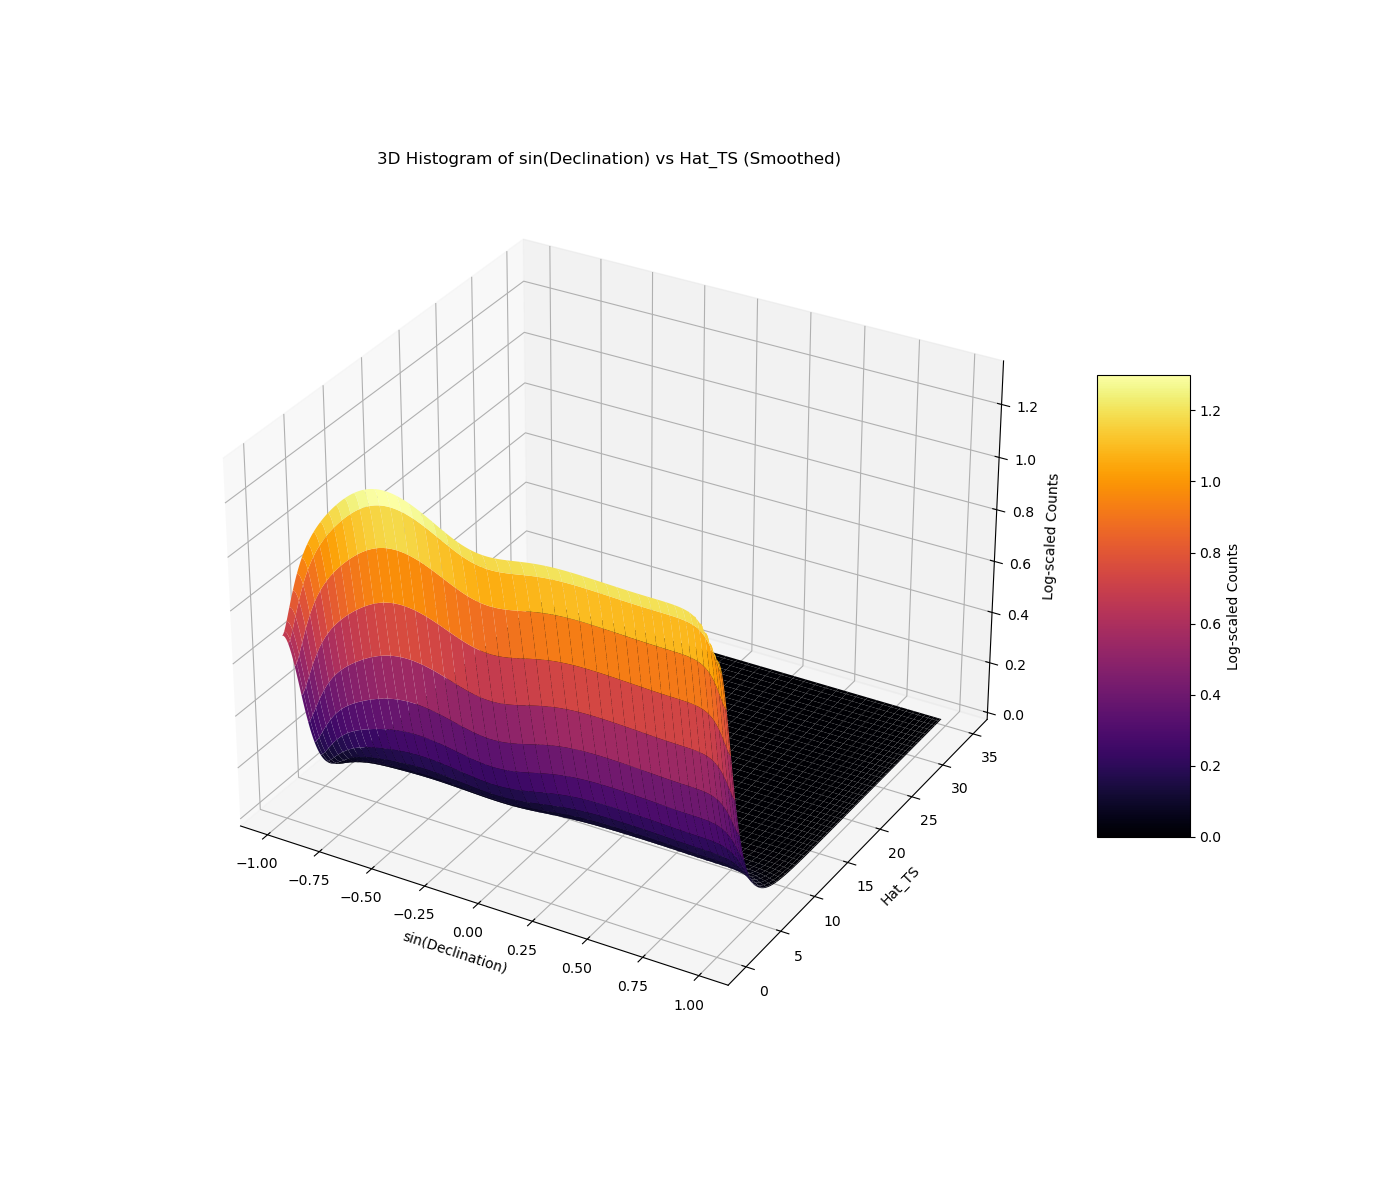

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter

# Load the .npz file

histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Verify the data
print("Histogram 2D Shape:", histogram_2d.shape)
print("X edges (Declination):", x_edges[0], "to", x_edges[-1])
print("Y edges (Hat_TS):", y_edges[0], "to", y_edges[-1])
print("Histogram Data Sum:", np.sum(histogram_2d))

# Apply sine transformation to x_edges
sin_x_edges = np.sin(np.radians(x_edges))

# Verify transformed x_edges
print("Transformed X edges (sin(Declination)):", sin_x_edges[0], "to", sin_x_edges[-1])

# Log-transform the histogram data
log_histogram_2d = np.log1p(histogram_2d)
print("Log-transformed histogram data range: ", np.min(log_histogram_2d), "to", np.max(log_histogram_2d))

# Apply Gaussian smoothing to the log-transformed data
sigma = 10  # Adjust sigma value as needed for desired smoothing level
smoothed_log_histogram_2d = gaussian_filter(log_histogram_2d, sigma=sigma)

# Create a 3D plot
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for plotting
X, Y = np.meshgrid(sin_x_edges[:-1], y_edges[:-1])

# Plot the surface with the smoothed data
surf = ax.plot_surface(X, Y, smoothed_log_histogram_2d.T, cmap='inferno', edgecolor='none')

# Add color bar which maps values to colors
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Log-scaled Counts')

# Labels and title
ax.set_xlabel('sin(Declination)')
ax.set_ylabel('Hat_TS')
ax.set_zlabel('Log-scaled Counts')
ax.set_title('3D Histogram of sin(Declination) vs Hat_TS (Smoothed)')

# Show the plot
plt.show()

KeyboardInterrupt: 

Histogram 2D Shape: (100, 100)
X edges (Declination): -81.0 to 81.0
Y edges (Hat_TS): 0.0 to 35.0
Histogram Data Sum: 232482600.0
Plot saved as /home/kennedyc/DESY Project/images/Fraction_of_hat_ts_Values_Greater_Than_Zero_vs_sin(Declination).png


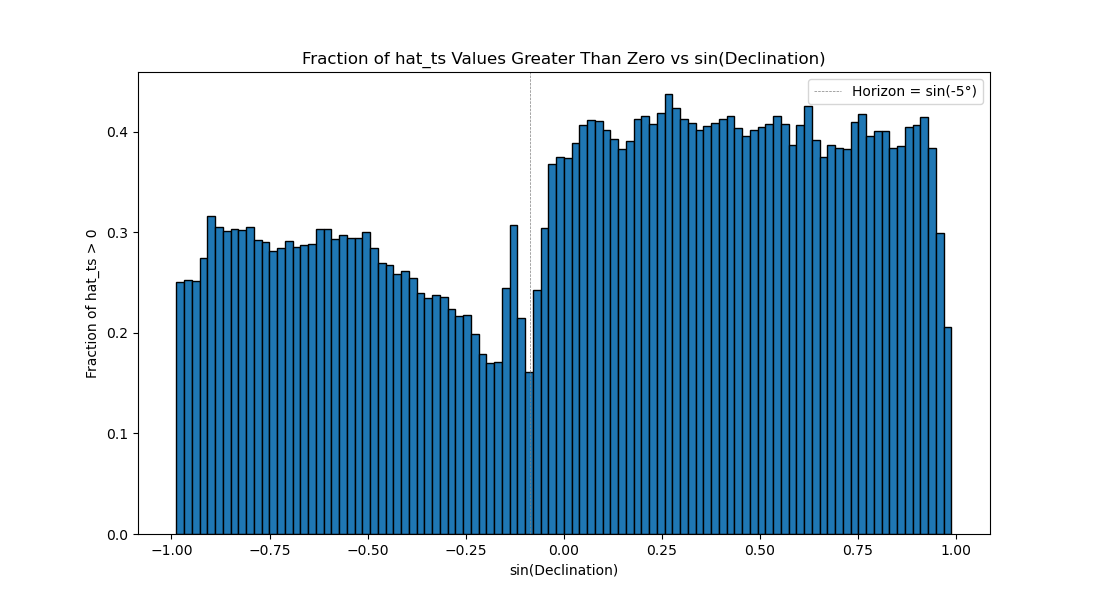

In [12]:
# Verify the data
print("Histogram 2D Shape:", histogram_2d.shape)
print("X edges (Declination):", x_edges[0], "to", x_edges[-1])
print("Y edges (Hat_TS):", y_edges[0], "to", y_edges[-1])
print("Histogram Data Sum:", np.sum(histogram_2d))

# Apply sine transformation to x_edges
sin_x_edges = np.sin(np.radians(x_edges))

# Check if histogram_2d is defined and has the correct dimensions
if histogram_2d.ndim == 2:
    # Compute the sum of counts for each declination bin
    sum_dec_counts = np.sum(histogram_2d, axis=1)

    # Normalize histogram_2d by the sum of counts for each declination bin
    normalized_histogram_2d = np.divide(histogram_2d, sum_dec_counts[:, None], where=sum_dec_counts[:, None] != 0)

    # Determine the threshold value on the x-axis (Hat_TS)
    threshold_hat_ts = 8

    # Find the index of the bin where Hat_TS crosses the threshold
    bin_index_for_threshold = np.digitize(threshold_hat_ts, y_edges) - 1

    # Find max and min normalized counts using vectorized operations
    counts_at_threshold = normalized_histogram_2d[:, bin_index_for_threshold]
    max_bin_index = np.argmax(counts_at_threshold)
    max_normalized_count = counts_at_threshold[max_bin_index]
    positive_counts_at_threshold = counts_at_threshold[counts_at_threshold > 0]
    min_bin_index = np.argmin(positive_counts_at_threshold)
    min_normalized_count = positive_counts_at_threshold[min_bin_index] if len(positive_counts_at_threshold) > 0 else np.inf

# Convert declination edges to sine of declination
sin_x_edges = np.sin(np.radians(x_edges))

# Define uniform bins in the sine space
num_bins = len(sin_x_edges) - 1
uniform_sin_x_edges = np.linspace(sin_x_edges[0], sin_x_edges[-1], num_bins + 1)

# Initialize the fraction array
fraction_greater_than_zero = np.zeros(num_bins)

for i in range(num_bins):
    # Find the declination bin that corresponds to the current sine bin
    decl_bin_start = np.searchsorted(sin_x_edges, uniform_sin_x_edges[i], side='right') - 1
    decl_bin_end = np.searchsorted(sin_x_edges, uniform_sin_x_edges[i + 1], side='right') - 1

    # Aggregate the values from the corresponding declination bins
    total_counts = np.sum(histogram_2d[decl_bin_start:decl_bin_end + 1, :])
    hat_ts_bin_start = np.digitize(0, y_edges)  # Find the index where hat_ts = 0
    counts_greater_than_zero = np.sum(histogram_2d[decl_bin_start:decl_bin_end + 1, hat_ts_bin_start:])

    # Compute the fraction
    fraction_greater_than_zero[i] = counts_greater_than_zero / total_counts if total_counts > 0 else 0

# Calculate the midpoints for the bins in terms of sine declination
sin_x_midpoints = (uniform_sin_x_edges[:-1] + uniform_sin_x_edges[1:]) / 2
bin_width = uniform_sin_x_edges[1] - uniform_sin_x_edges[0]

# Plot the histogram
plt.figure(figsize=(11, 6))
plt.bar(sin_x_midpoints, fraction_greater_than_zero, width=bin_width, align='center', edgecolor='black')
plt.xlabel('sin(Declination)')
plt.ylabel('Fraction of hat_ts > 0')
plt.title('Fraction of hat_ts Values Greater Than Zero vs sin(Declination)')
plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=0.5, label='Horizon = sin(-5°)')
#plt.axvline(x=np.sin(np.radians(x_edges[max_bin_index])), color='green', linestyle='--', linewidth=0.5, label=f'Max Dec ~ sin({x_edges[max_bin_index]:.2g}°)')
#plt.axvline(x=np.sin(np.radians(x_edges[min_bin_index])), color='black', linestyle='--', linewidth=0.5, label=f'Min Dec ~ sin({x_edges[min_bin_index]:.2g}°)')
plt.legend()
plt.grid(False)
fig = plt.gcf()  # Get the current figure
ax = plt.gca()   # Get the current axes

# Save the plot
save_plot(fig, ax)
plt.show()

Plot saved as /home/kennedyc/DESY Project/images/Fraction_of_hat_ts_Values_Above_Threshold_vs_sin(Declination).png


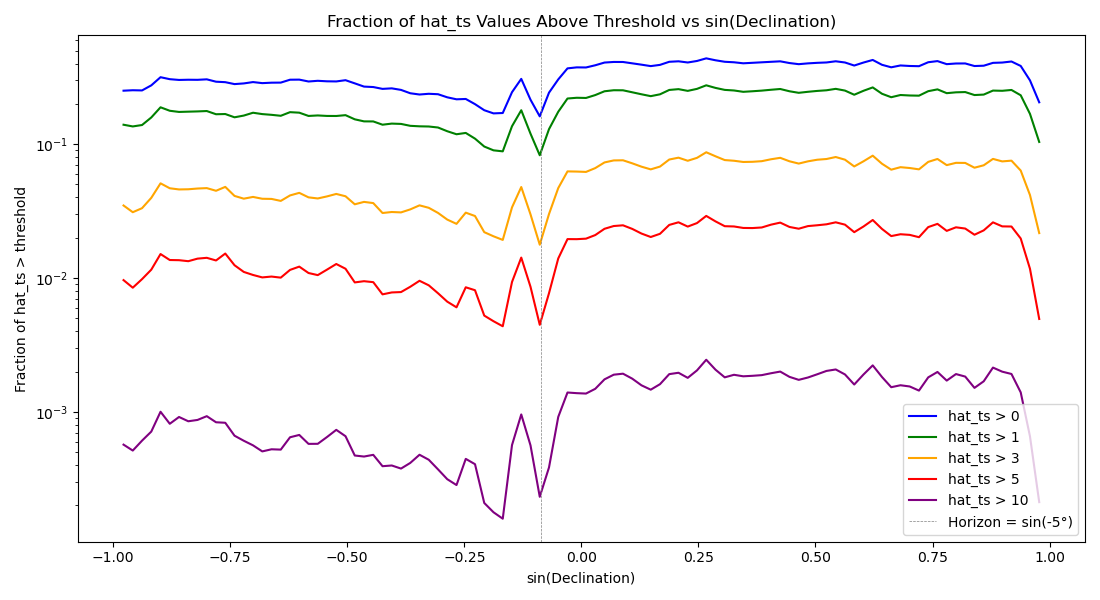

In [13]:

# Initialize the fraction arrays for different thresholds
fraction_greater_than_zero = np.zeros(num_bins)
fraction_greater_than_one = np.zeros(num_bins)
fraction_greater_than_three = np.zeros(num_bins)
fraction_greater_than_five = np.zeros(num_bins)
fraction_greater_than_ten = np.zeros(num_bins)

for i in range(num_bins):
    # Find the declination bin that corresponds to the current sine bin
    decl_bin_start = np.searchsorted(sin_x_edges, uniform_sin_x_edges[i], side='right') - 1
    decl_bin_end = np.searchsorted(sin_x_edges, uniform_sin_x_edges[i + 1], side='right') - 1

    # Aggregate the values from the corresponding declination bins
    total_counts = np.sum(histogram_2d[decl_bin_start:decl_bin_end + 1, :])
    
    # Find the indices corresponding to the threshold values
    hat_ts_bin_start = np.digitize(0, y_edges)
    hat_ts_bin_one = np.digitize(1, y_edges)
    hat_ts_bin_three = np.digitize(3, y_edges)
    hat_ts_bin_five = np.digitize(5, y_edges)
    hat_ts_bin_ten = np.digitize(10, y_edges)

    # Calculate the counts greater than each threshold
    counts_greater_than_zero = np.sum(histogram_2d[decl_bin_start:decl_bin_end + 1, hat_ts_bin_start:])
    counts_greater_than_one = np.sum(histogram_2d[decl_bin_start:decl_bin_end + 1, hat_ts_bin_one:])
    counts_greater_than_three = np.sum(histogram_2d[decl_bin_start:decl_bin_end + 1, hat_ts_bin_three:])
    counts_greater_than_five = np.sum(histogram_2d[decl_bin_start:decl_bin_end + 1, hat_ts_bin_five:])
    counts_greater_than_ten = np.sum(histogram_2d[decl_bin_start:decl_bin_end + 1, hat_ts_bin_ten:])

    # Compute the fractions
    fraction_greater_than_zero[i] = counts_greater_than_zero / total_counts if total_counts > 0 else 0
    fraction_greater_than_one[i] = counts_greater_than_one / total_counts if total_counts > 0 else 0
    fraction_greater_than_three[i] = counts_greater_than_three / total_counts if total_counts > 0 else 0
    fraction_greater_than_five[i] = counts_greater_than_five / total_counts if total_counts > 0 else 0
    fraction_greater_than_ten[i] = counts_greater_than_ten / total_counts if total_counts > 0 else 0

# Calculate the midpoints for the bins in terms of sine declination
sin_x_midpoints = (uniform_sin_x_edges[:-1] + uniform_sin_x_edges[1:]) / 2
bin_width = uniform_sin_x_edges[1] - uniform_sin_x_edges[0]

# Plot the fractions for each threshold
plt.figure(figsize=(11, 6))
plt.plot(sin_x_midpoints, fraction_greater_than_zero, label='hat_ts > 0', color='blue')
plt.plot(sin_x_midpoints, fraction_greater_than_one, label='hat_ts > 1', color='green')
plt.plot(sin_x_midpoints, fraction_greater_than_three, label='hat_ts > 3', color='orange')
plt.plot(sin_x_midpoints, fraction_greater_than_five, label='hat_ts > 5', color='red')
plt.plot(sin_x_midpoints, fraction_greater_than_ten, label='hat_ts > 10', color='purple')

# Customize the plot
plt.xlabel('sin(Declination)')
plt.ylabel('Fraction of hat_ts > threshold')
plt.yscale('log')
plt.title('Fraction of hat_ts Values Above Threshold vs sin(Declination)')
plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=0.5, label='Horizon = sin(-5°)')
plt.legend()
plt.grid(False)
plt.tight_layout()

# Save and show the plot
fig = plt.gcf()  # Get the current figure
ax = plt.gca()   # Get the current axes
save_plot(fig, ax)
plt.show()


In [21]:
# # Assuming histogram_2d, x_edges, y_edges, max_bin_index, and min_bin_index are defined

# # Convert declination edges to sine of declination
# sin_x_edges = np.sin(np.radians(x_edges))

# # Define uniform bins in the sine space
# num_bins = len(sin_x_edges) - 1
# uniform_sin_x_edges = np.linspace(sin_x_edges[0], sin_x_edges[-1], num_bins + 1)

# # Initialize the fraction array
# fraction_greater_than_zero = np.zeros(num_bins)

# for i in range(num_bins):
#     # Find the declination bin that corresponds to the current sine bin
#     decl_bin_start = np.searchsorted(sin_x_edges, uniform_sin_x_edges[i], side='right') - 1
#     decl_bin_end = np.searchsorted(sin_x_edges, uniform_sin_x_edges[i + 1], side='right') - 1

#     # Aggregate the values from the corresponding declination bins
#     total_counts = np.sum(histogram_2d[decl_bin_start:decl_bin_end + 1, :])
#     hat_ts_bin_start = np.digitize(0, y_edges)  # Find the index where hat_ts = 0
#     counts_greater_than_zero = np.sum(histogram_2d[decl_bin_start:decl_bin_end + 1, hat_ts_bin_start:])

#     # Compute the fraction
#     fraction_greater_than_zero[i] = counts_greater_than_zero / total_counts if total_counts > 0 else 0

# # Calculate the midpoints for the bins in terms of sine declination
# sin_x_midpoints = (uniform_sin_x_edges[:-1] + uniform_sin_x_edges[1:]) / 2
# bin_width = uniform_sin_x_edges[1] - uniform_sin_x_edges[0]

# # Plot the histogram
# plt.figure(figsize=(10, 6))
# plt.bar(sin_x_midpoints, fraction_greater_than_zero, width=bin_width, align='center', edgecolor='black')
# plt.xlabel('sin(Declination)')
# plt.ylabel('Fraction of hat_ts > 0')
# plt.title('Fraction of hat_ts Values Greater Than Zero vs sin(Declination)')
# plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=2, label='Horizon = sin(-5°)')
# plt.axvline(x=np.sin(np.radians(x_edges[max_bin_index])), color='green', linestyle='--', linewidth=2, label=f'Max Dec ~ sin({x_edges[max_bin_index]:.2g}°)')
# plt.axvline(x=np.sin(np.radians(x_edges[min_bin_index])), color='black', linestyle='--', linewidth=2, label=f'Min Dec ~ sin({x_edges[min_bin_index]:.2g}°)')
# plt.legend()
# plt.grid(False)
# fig = plt.gcf()  # Get the current figure
# ax = plt.gca()   # Get the current axes

# # Save the plot
# save_plot(fig, ax)
# plt.show()


Maximum normalized count bin index: 6341
Maximum highlighted declination: 24.683333333333337
Minimum normalized count bin index: 4510
Minimum highlighted declination: -5.833333333333329


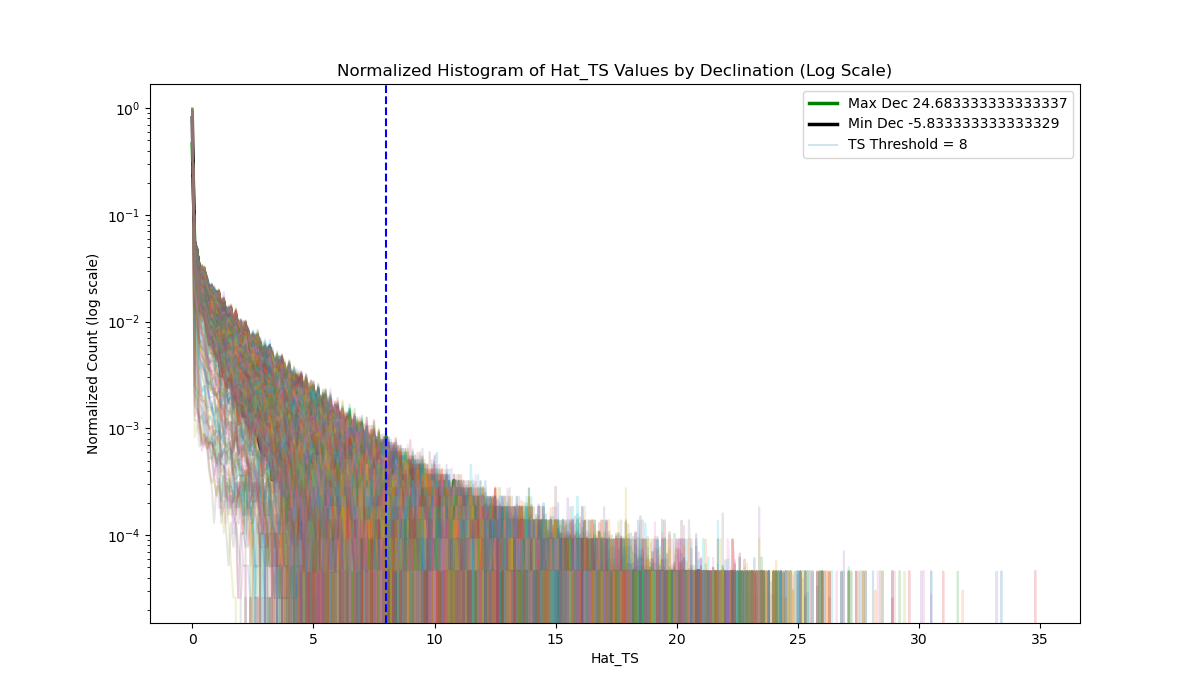

In [22]:
import numpy as np
import matplotlib.pyplot as plt
# Assuming histogram_2d, x_edges, y_edges are already defined

# Compute the sum of counts for each declination bin
sum_dec_counts = np.sum(histogram_2d, axis=1)

# Normalize histogram_2d by the sum of counts for each declination bin using vectorized operations
normalized_histogram_2d = np.divide(histogram_2d.T, sum_dec_counts, where=sum_dec_counts != 0).T

# Determine the threshold value on the x-axis (Hat_TS)
threshold_hat_ts = 8

# Find the index of the bin where Hat_TS crosses the threshold
bin_index_for_threshold = np.digitize(threshold_hat_ts, y_edges) - 1

# Initialize variables to find maximum and minimum normalized counts
counts_at_threshold = normalized_histogram_2d[:, bin_index_for_threshold]
max_bin_index = np.argmax(counts_at_threshold)
min_bin_index = np.argmin(counts_at_threshold[np.nonzero(counts_at_threshold)])
min_bin_index = np.where(counts_at_threshold == counts_at_threshold[np.nonzero(counts_at_threshold)][min_bin_index])[0][0]

# Find the first declination bin where the normalized count at the Hat_TS threshold exceeds the threshold value
highlight_bin = np.where(counts_at_threshold > threshold_hat_ts)[0]
highlight_bin = highlight_bin[0] if len(highlight_bin) > 0 else None
highlight_declination = x_edges[highlight_bin] if highlight_bin is not None else None

# Print the highlighted bins and their declinations
print(f"Maximum normalized count bin index: {max_bin_index}")
if max_bin_index is not None:
    print(f"Maximum highlighted declination: {x_edges[max_bin_index]}")

print(f"Minimum normalized count bin index: {min_bin_index}")
if min_bin_index is not None:
    print(f"Minimum highlighted declination: {x_edges[min_bin_index]}")

if highlight_bin is not None:
    print(f"Highlighted line plotted for declination {highlight_declination}")

# Plot the normalized histogram with a logarithmic scale
plt.figure(figsize=(12, 7))

# Lists to hold labels for the legend
legend_labels = []

# Plot the highlighted line for the specific declination if found
if highlight_bin is not None:
    plt.plot(y_edges[:-1], normalized_histogram_2d[highlight_bin, :], color='red', linewidth=2.5, label=f'Dec {highlight_declination}')
    legend_labels.append(f'Dec {highlight_declination}')

# Plot the highlighted maximum and minimum lines
if max_bin_index is not None:
    plt.plot(y_edges[:-1], normalized_histogram_2d[max_bin_index, :], color='green', linewidth=2.5, label=f'Max Dec {x_edges[max_bin_index]}')
    legend_labels.append(f'Max Dec {x_edges[max_bin_index]}')

if min_bin_index is not None:
    plt.plot(y_edges[:-1], normalized_histogram_2d[min_bin_index, :], color='black', linewidth=2.5, label=f'Min Dec {x_edges[min_bin_index]}')
    legend_labels.append(f'Min Dec {x_edges[min_bin_index]}')

# Plot the other lines but do not add labels for them
for i in range(len(x_edges) - 1):
    if i != max_bin_index and i != min_bin_index and i != highlight_bin:
        plt.plot(y_edges[:-1], normalized_histogram_2d[i, :], alpha=0.2)

# Add a vertical line for emphasis at the threshold if needed
plt.axvline(x=threshold_hat_ts, color='blue', linestyle='--', label='Hat_TS Threshold')
legend_labels.append(f'TS Threshold = {threshold_hat_ts}')

# Set the legend with only the specified labels
plt.xlabel('Hat_TS')
plt.ylabel('Normalized Count (log scale)')
plt.title('Normalized Histogram of Hat_TS Values by Declination (Log Scale)')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.legend(legend_labels)  # Show legend with specific labels
plt.show()



Plot saved as /home/kennedyc/DESY Project/images/Anti-Cumulative_Distribution_of_Normalized_Test_Statistics.png


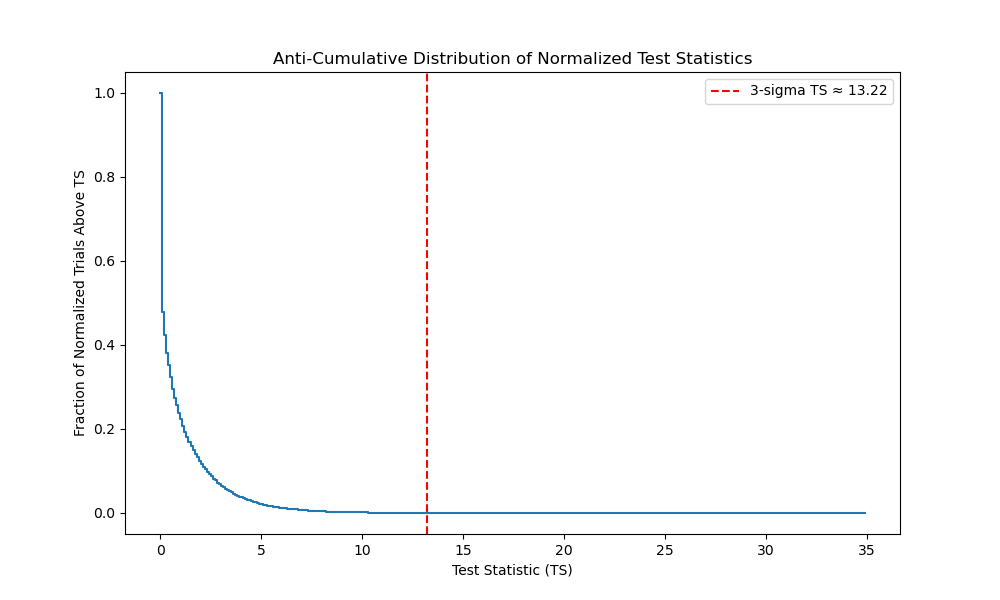

In [23]:
# Pick sepcific declination for this,   sin(0) sin(+5 +6 + 45 -45)

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

declinations = [0, 5, 6, 45, -45]
sin_dec = np.sin(declinations)

indices = [np.abs(x_edges - sd).argmin() for sd in sin_dec]


# Compute the sum of counts for each declination bin
sum_dec_counts = np.sum(histogram_2d[indices, :], axis=1)

# Normalize histogram_2d by the sum of counts for each specified declination bin
normalized_histogram_2d = np.zeros_like(histogram_2d, dtype=float)
for idx in indices:
    total_counts = np.sum(histogram_2d[idx, :])
    if total_counts > 0:
        normalized_histogram_2d[idx, :] = histogram_2d[idx, :] / total_counts


# Sum the normalized histogram data along the declination axis (x-axis)
sum_norm_hist = np.sum(normalized_histogram_2d[indices, :],  axis=0)

# Calculate the cumulative sum and then the anti-cumulative distribution
cumulative_sum_norm_hist = np.cumsum(sum_norm_hist[::-1])[::-1]
total_trials_norm = cumulative_sum_norm_hist[0]
fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm

# Chi-squared critical value for 3-sigma significance with 2 degrees of freedom
alpha = 0.0027/ 2 # p-value corresponding to 3-sigma
degrees_of_freedom = 2
critical_value = chi2.ppf(1 - alpha, df=degrees_of_freedom)

# Find the TS value closest to the critical value
closest_ts_index = np.searchsorted(y_edges[:-1], critical_value, side='left')
closest_ts_value = y_edges[closest_ts_index]

#print(f"Chi-squared critical value for 3-sigma significance: {critical_value:.2f}")
#print(f"Corresponding TS value: {closest_ts_value:.2f}")

# Plot the anti-cumulative distribution with log-log scale
plt.figure(figsize=(10, 6))
plt.plot(y_edges[:-1], fraction_above_ts_norm, drawstyle='steps-post')
# plt.xscale('log')
# plt.yscale('log')
plt.axvline(x=critical_value, color='r', linestyle='--', label=f'3-sigma TS ≈ {critical_value:.2f}')
plt.xlabel('Test Statistic (TS)')
plt.ylabel('Fraction of Normalized Trials Above TS')
plt.title('Anti-Cumulative Distribution of Normalized Test Statistics')
# plt.grid(True, which="both", ls="--")
plt.legend()
fig = plt.gcf()  # Get the current figure
ax = plt.gca()   # Get the current axes

# Save the plot
save_plot(fig, ax)
plt.show()

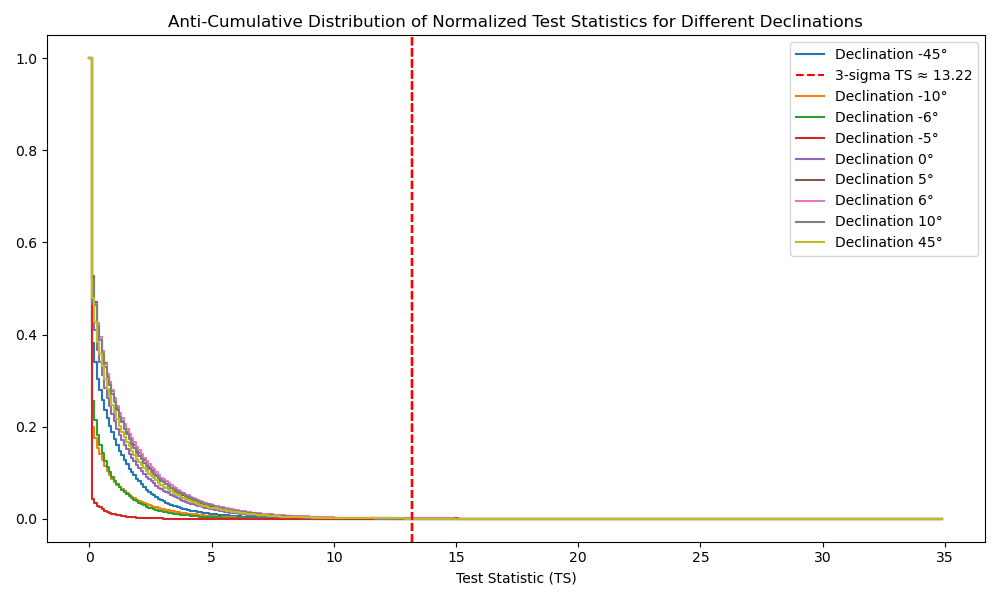

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']




north = [0 , 5, 6, 10, 45]
south = [0, -5, -6, -10, -45]
horizon = [-6, -5, 0, 5, 6]
globe = [-45, -10, -6, -5, 0, 5, 6, 10, 45]
# Define specific declination values (in degrees)
declinations = globe

# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Chi-squared critical value for 3-sigma significance with 2 degrees of freedom
alpha = 0.0027/2  # p-value corresponding to 3-sigma
degrees_of_freedom = 2
critical_value = chi2.ppf(1 - alpha, df=degrees_of_freedom)

# Create subplots
#fig, axs = plt.subplots(len(declinations), 1, figsize=(10, 18))

# for i, idx in enumerate(indices):
#     # Check and print the current declination index and its corresponding degree value
#     print(f"Processing Declination: {declinations[i]}°")
#     print(f"Using index: {idx}, x_edge value: {x_edges[idx]}")
    
#     # Normalize the 2D histogram for the current declination bin
#     total_counts = np.sum(histogram_2d[idx, :])
#     if total_counts > 0:
#         normalized_histogram = histogram_2d[idx, :] / total_counts

#         # Calculate the cumulative sum and anti-cumulative distribution
#         cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
#         total_trials_norm = cumulative_sum_norm_hist[0]
#         fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm

#         # Find the TS value closest to the critical value
#         closest_ts_index = np.searchsorted(y_edges[:-1], critical_value, side='left')
#         closest_ts_value = y_edges[closest_ts_index]

#         # Plot the anti-cumulative distribution for the current declination
#         axs[i].plot(y_edges[:-1], fraction_above_ts_norm, drawstyle='steps-post')
#         axs[i].axvline(x=critical_value, color='r', linestyle='--', label=f'3-sigma TS ≈ {critical_value:.2f}')
#         axs[i].set_xlabel('Test Statistic (TS)')
#         axs[i].set_ylabel('Fraction of Normalized Trials Above TS')
#         axs[i].set_title(f'Anti-Cumulative Distribution for Declination {declinations[i]}°')
#         axs[i].legend()
#         axs[i].grid(True, which="both", ls="--")

# plt.tight_layout()
# plt.show()
#print(south)


plt.figure(figsize=(10, 6))
for i, idx in enumerate(indices):
    # Normalize the 2D histogram for the current declination bin
    total_counts = np.sum(histogram_2d[idx, :])
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts

        # Calculate the cumulative sum and anti-cumulative distribution
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm

        # Find the TS value closest to the critical value
        closest_ts_index = np.searchsorted(y_edges[:-1], critical_value, side='left')
        closest_ts_value = y_edges[closest_ts_index]

        # Plot the anti-cumulative distribution for the current declination
        plt.plot(y_edges[:-1], fraction_above_ts_norm, drawstyle='steps-post', label=f'Declination {declinations[i]}°')
        plt.axvline(x=critical_value, color='r', linestyle='--', label=f'3-sigma TS ≈ {critical_value:.2f}' if i == 0 else "")

plt.xlabel('Test Statistic (TS)')

plt.title('Anti-Cumulative Distribution of Normalized Test Statistics for Different Declinations')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

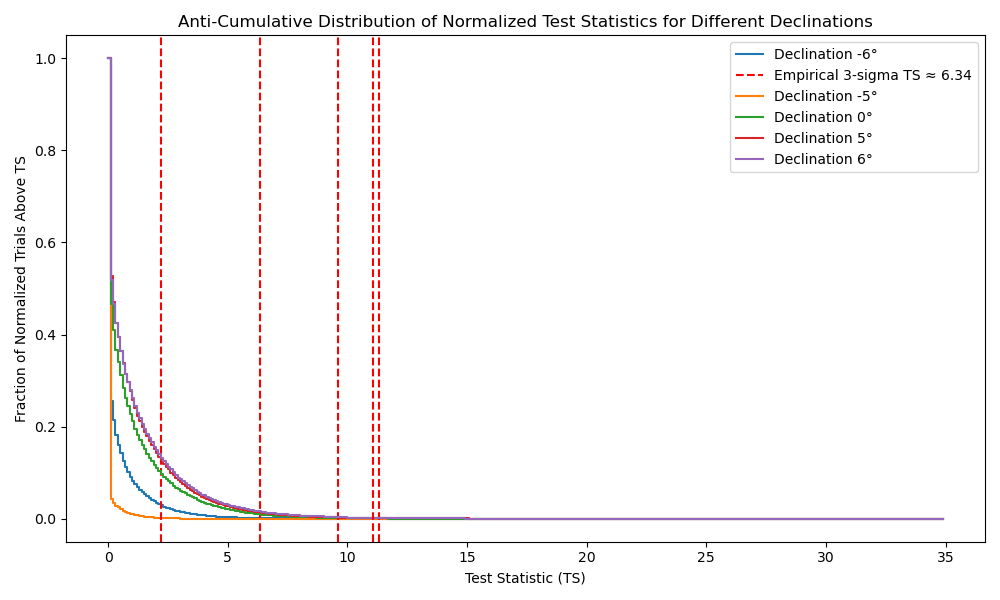

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

north = [0 , 5, 6, 10, 45]
south = [0, -5, -6, -10, -45]
horizon = [-6, -5, 0, 5, 6]
globe = [-45, -10, -6, -5, 0, 5, 6, 10, 45]

# Define specific declination values (in degrees)
declinations = horizon

# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Create a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    #print(f"Total Trials: {total_trials}, p_value * total_trials: {target}")
    
    # Check if the target value is within the range of the cumulative distribution
    if target > cumulative_distribution[0] or target < cumulative_distribution[-1]:
        #print("Target is out of the range of the cumulative distribution.")
        return y_edges[-1] if target < cumulative_distribution[-1] else y_edges[0]
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    #print(f"Critical Index: {critical_index}, Interpolated Critical Value: {critical_value}")
    return critical_value

# Create subplots
plt.figure(figsize=(10, 6))

for i, idx in enumerate(indices):
    #print(f"Processing Declination: {declinations[i]}° (Index: {idx}, x_edge value: {x_edges[idx]})")
    
    # Normalize the 2D histogram for the current declination bin
    total_counts = np.sum(histogram_2d[idx, :])
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts

        # Calculate the cumulative sum and anti-cumulative distribution
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm

        #print(f"Total Counts: {total_counts}, Total Trials Norm: {total_trials_norm}")
        #print(f"Cumulative Sum Normalized Histogram: {cumulative_sum_norm_hist}")
        
        # Calculate the empirical critical value for the current declination
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Plot the anti-cumulative distribution for the current declination
        plt.plot(y_edges[:-1], fraction_above_ts_norm, drawstyle='steps-post', label=f'Declination {declinations[i]}°')
        plt.axvline(x=empirical_critical_value, color='r', linestyle='--', label=f'Empirical 3-sigma TS ≈ {empirical_critical_value:.2f}' if i == 0 else "")

plt.xlabel('Test Statistic (TS)')
plt.ylabel('Fraction of Normalized Trials Above TS')
plt.title('Anti-Cumulative Distribution of Normalized Test Statistics for Different Declinations')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()



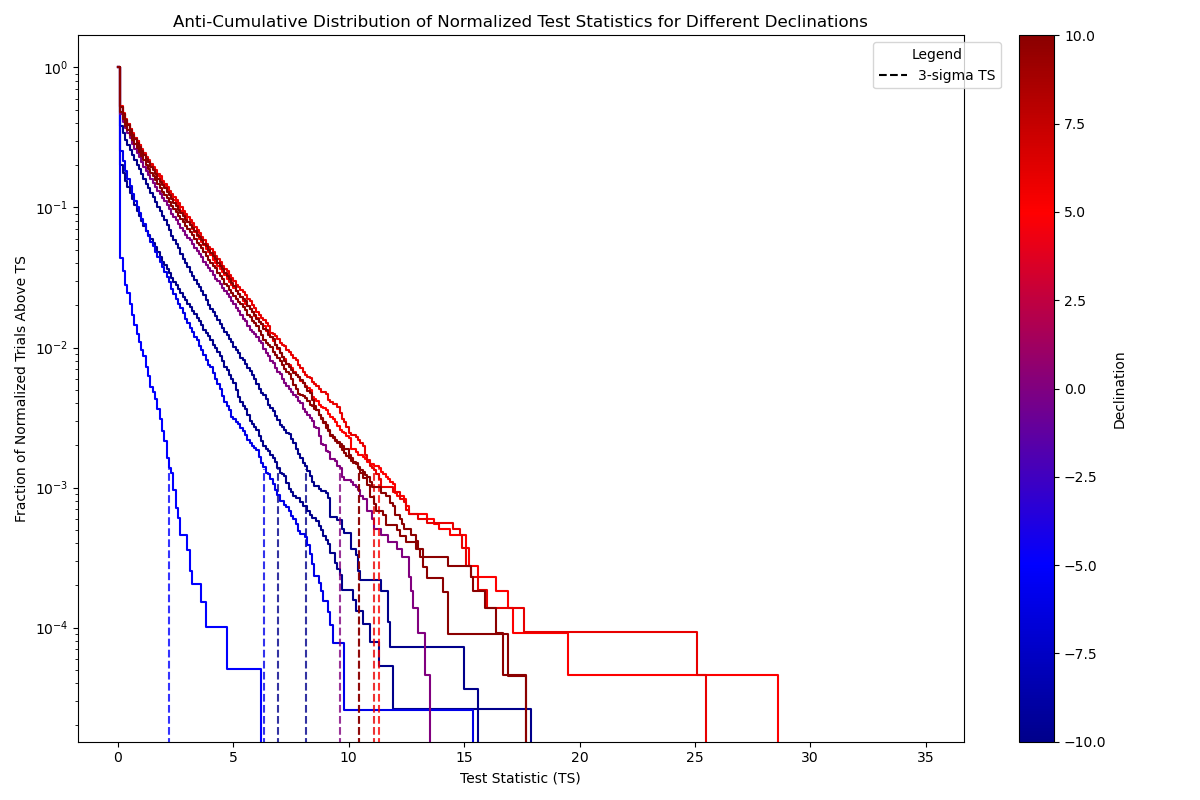

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Define specific declination values (in degrees)
declinations = [-45, -10, -6, -5, 0, 5, 6, 10, 45]

# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Define a colormap with the desired gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_gradient', 
    ['#00008B', '#0000FF', '#800080', '#FF0000', '#8B0000'],  # Dark Blue to Dark Red
    N=256
)

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=-10, vmax=10)

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the anti-cumulative distributions and 3-sigma TS lines
for decl in declinations:
    color = cmap(norm(decl))
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Plot the anti-cumulative distribution
        ax.plot(y_edges[:-1], fraction_above_ts_norm, drawstyle='steps-post', color=color)

        # Calculate the intersection for 3-sigma TS lines
        y_critical = np.interp(empirical_critical_value, y_edges[:-1], fraction_above_ts_norm)
        
        # Plot vertical line up to the intersection point
        ax.plot([empirical_critical_value, empirical_critical_value], [0, y_critical], color=color, linestyle='--', alpha=0.8)

        # Plot horizontal line with transparency from y-axis to the intersection point
        ax.plot([0, empirical_critical_value], [y_critical, y_critical], color=color, linestyle='--', alpha=0)

# Create a single legend entry for the 3-sigma TS lines
sigma_line = plt.Line2D([0], [0], color='black', linestyle='--')
ax.legend([sigma_line], ['3-sigma TS'], loc='upper right', bbox_to_anchor=(1.05, 1), title='Legend')

# Add the colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Declination')

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title('Anti-Cumulative Distribution of Normalized Test Statistics for Different Declinations')
ax.set_yscale('log')
ax.grid(False)
plt.tight_layout()
plt.show()


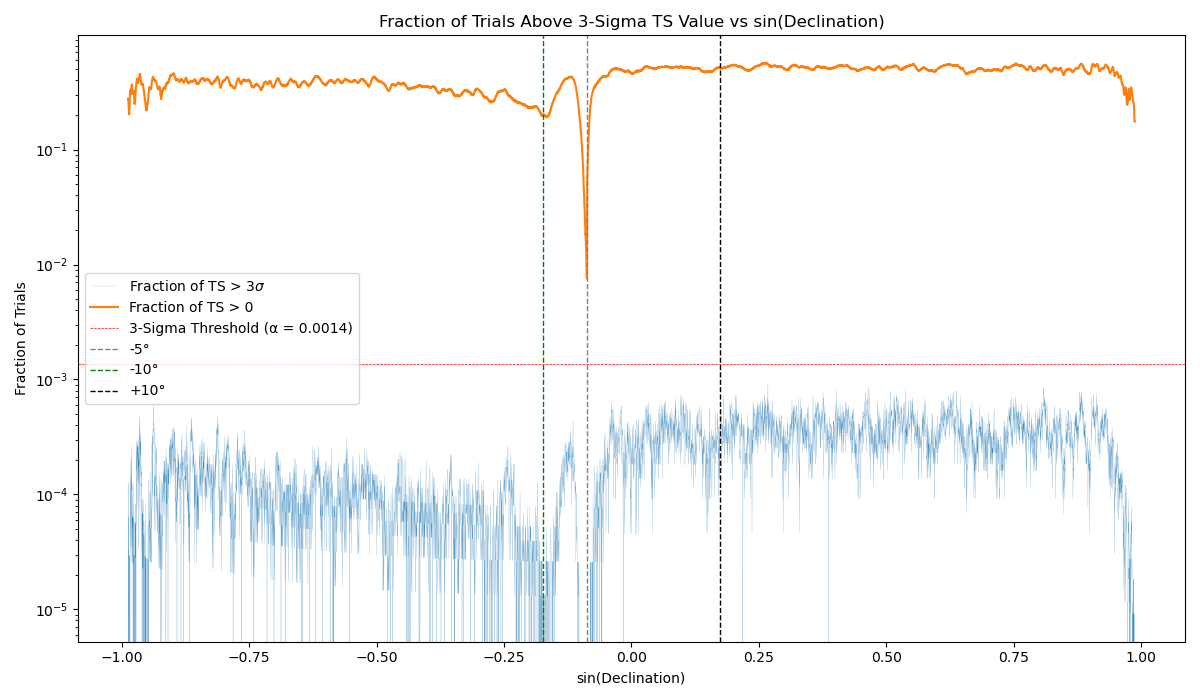

In [27]:
# Load the .npz file
# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Compute the sum of counts for each declination bin
sum_dec_counts = np.sum(histogram_2d, axis=1)

# Compute 3-sigma significance with 2 degrees of freedom
alpha = 0.0027 / 2  # p-value corresponding to 3-sigma, divided by 2
degrees_of_freedom = 2
critical_value = chi2.ppf(1 - alpha, df=degrees_of_freedom)

#print(f"Critical value for 3-sigma significance: {critical_value}")

# Convert declination edges to sine of declination
sin_x_edges = np.sin(np.radians(x_edges))

# Define uniform bins in the sine space
num_bins = len(sin_x_edges) - 1
uniform_sin_x_edges = np.linspace(sin_x_edges[0], sin_x_edges[-1], num_bins + 1)

# Initialize the fraction array
fraction_above_ts = np.zeros(num_bins)
fraction_greater_than_zero = np.zeros(num_bins)  # Initialize for TS > 0

# Function for converting declination to sin(dec)
for i in range(num_bins):
    # Find the declination bins that correspond to the current sine bin
    decl_bin_start = np.searchsorted(sin_x_edges, uniform_sin_x_edges[i], side='right') - 1
    decl_bin_end = np.searchsorted(sin_x_edges, uniform_sin_x_edges[i + 1], side='right') - 1
    
    # Ensure indices are within bounds
    decl_bin_start = max(0, decl_bin_start)
    decl_bin_end = min(len(histogram_2d) - 1, decl_bin_end)
    
    # Aggregate the values from the corresponding declination bins
    total_counts = np.sum(sum_dec_counts[decl_bin_start:decl_bin_end + 1])
    counts_above_ts = np.sum([
        np.sum(histogram_2d[j, y_edges[:-1] >= critical_value]) 
        for j in range(decl_bin_start, decl_bin_end + 1)
    ])
    counts_greater_than_zero = np.sum([
        np.sum(histogram_2d[j, y_edges[:-1] > 0]) 
        for j in range(decl_bin_start, decl_bin_end + 1)
    ])
    
    # Compute the fractions
    fraction_above_ts[i] = counts_above_ts / total_counts if total_counts > 0 else 0
    fraction_greater_than_zero[i] = counts_greater_than_zero / total_counts if total_counts > 0 else 0

    #print(f"Bin {i}: decl_bin_start={decl_bin_start}, decl_bin_end={decl_bin_end}, total_counts={total_counts}, counts_above_ts={counts_above_ts}, fraction_above_ts={fraction_above_ts[i]}")

# Calculate the midpoints for the bins in terms of sine declination
sin_x_midpoints = (uniform_sin_x_edges[:-1] + uniform_sin_x_edges[1:]) / 2
bin_width = uniform_sin_x_edges[1] - uniform_sin_x_edges[0]

# Check the range of fraction_above_ts
#print(f"Range of fraction_above_ts: min={np.min(fraction_above_ts)}, max={np.max(fraction_above_ts)}")

# Plot the histogram
plt.figure(figsize=(12, 7))
plt.plot(sin_x_midpoints, fraction_above_ts, label='Fraction of TS > ' + r'$3\sigma$', linewidth= 0.1)
plt.plot(sin_x_midpoints, fraction_greater_than_zero, label='Fraction of TS > 0')
plt.axhline(y=alpha, color='red', linestyle='--', linewidth=0.5, label=f'3-Sigma Threshold (α = {alpha:.4f})')
plt.xlabel('sin(Declination)')
plt.yscale('log')
plt.ylabel('Fraction of Trials')
plt.title('Fraction of Trials Above 3-Sigma TS Value vs sin(Declination)')
plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=1, label='-5°')
plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=1, label='-10°')
plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=1, label='+10°')
plt.legend()

# Adjust layout to prevent cutting off
plt.tight_layout()

plt.show()

Number of bins along the x-axis: 9720
Number of bins along the y-axis: 350


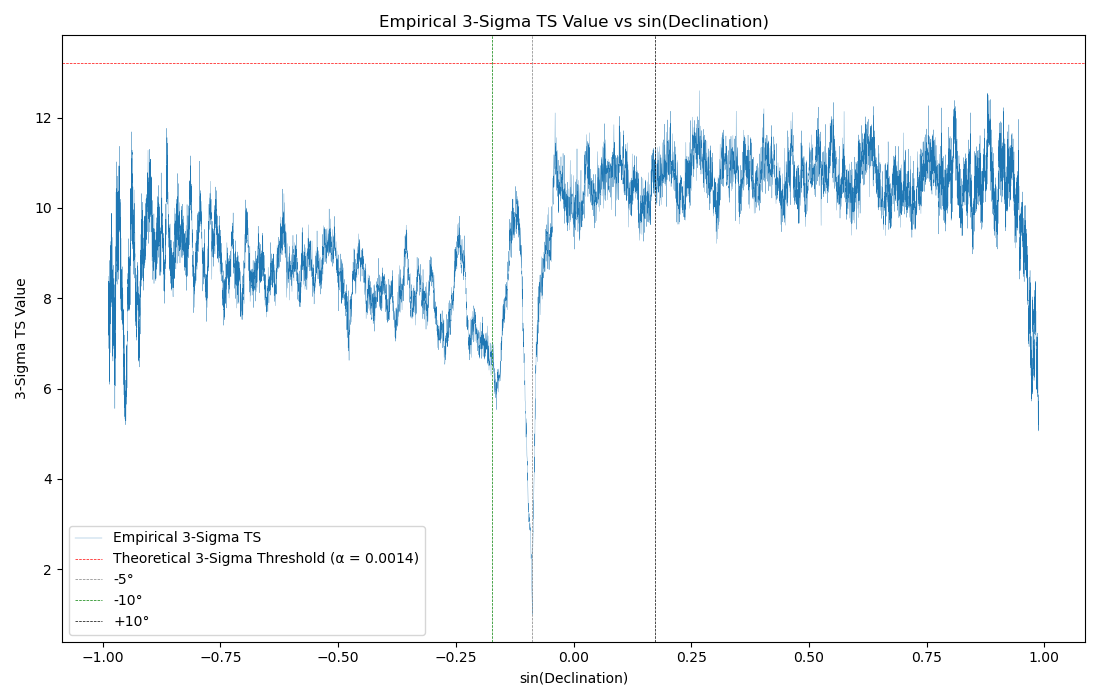

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']
# Calculate the number of bins
num_x_bins = len(x_edges) - 1
num_y_bins = len(y_edges) - 1

# Print the number of bins
print("Number of bins along the x-axis:", num_x_bins)
print("Number of bins along the y-axis:", num_y_bins)
# Compute the sum of counts for each declination bin
sum_dec_counts = np.sum(histogram_2d, axis=1)

# Compute 3-sigma significance with 2 degrees of freedom
alpha = 0.0027 / 2  # p-value corresponding to 3-sigma
degrees_of_freedom = 2
critical_value = chi2.ppf(1 - alpha, df=degrees_of_freedom)

#print(f"Chi-squared critical value for 3-sigma significance: {critical_value:.2f}")

# Convert declination edges to sine of declination
#sin_x_edges = np.sin(np.radians(x_edges))

# Initialize arrays to store empirical 3-sigma TS values and midpoints
empirical_3sigma_ts = []
sin_x_midpoints = []

for idx in range(len(x_edges) - 1):
    total_counts = np.sum(histogram_2d[idx, :])
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, alpha, y_edges[:-1])
        empirical_3sigma_ts.append(empirical_critical_value)
        sin_x_midpoints.append((sin_x_edges[idx] + sin_x_edges[idx + 1]) / 2)
        #print(f"Declination {x_edges[idx]:.2f}° to {x_edges[idx+1]:.2f}°: Empirical 3-Sigma TS = {empirical_critical_value:.2f}")

# Plot the empirical 3-sigma TS values as a function of sin(declination)
plt.figure(figsize=(11, 7))
plt.plot(sin_x_midpoints, empirical_3sigma_ts, label='Empirical 3-Sigma TS', linewidth=0.2)

plt.axhline(y=critical_value, color='red', linestyle='--', linewidth=0.5, label=f'Theoretical 3-Sigma Threshold (α = {alpha:.4f})')
plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=.5, label='-5°')
plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=.5, label='-10°')
plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=.5, label='+10°')
plt.xlabel('sin(Declination)')
plt.ylabel('3-Sigma TS Value')
plt.title('Empirical 3-Sigma TS Value vs sin(Declination)')
plt.grid(False)
plt.legend()
plt.tight_layout()

# Save and show the plot
plt.savefig('3sigma_ts_vs_sin_declination.png')
plt.show()

Number of bins along the x-axis: 100
Number of bins along the y-axis: 100


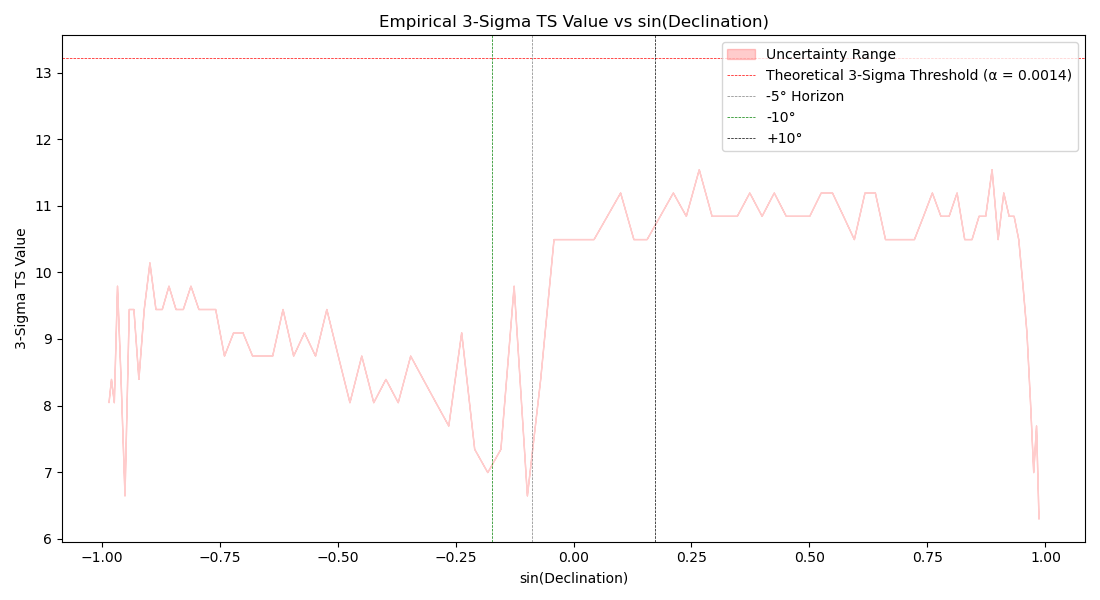

In [15]:
# Access the individual arrays

histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Calculate the number of bins
num_x_bins = len(x_edges) - 1
num_y_bins = len(y_edges) - 1

# Print the number of bins
print("Number of bins along the x-axis:", num_x_bins)
print("Number of bins along the y-axis:", num_y_bins)

# Compute the sum of counts for each declination bin
sum_dec_counts = np.sum(histogram_2d, axis=1)

# Compute 3-sigma significance with 2 degrees of freedom
alpha = 0.0027 / 2  # p-value corresponding to 3-sigma
degrees_of_freedom = 2
critical_value = chi2.ppf(1 - alpha, df=degrees_of_freedom)

# Convert declination edges to sine of declination
sin_x_edges = np.sin(np.radians(x_edges))

# Define a function to find the critical TS value
def find_critical_ts(cumulative_hist, alpha, y_edges):
    for i, value in enumerate(cumulative_hist):
        if value <= alpha:
            return y_edges[i]
    return y_edges[-1]

# Initialize arrays to store empirical 3-sigma TS values, midpoints, and uncertainties
empirical_3sigma_ts = []
sin_x_midpoints = []
uncertainty_lower = []
uncertainty_upper = []

for idx in range(len(x_edges) - 1):
    total_counts = np.sum(histogram_2d[idx, :])
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, alpha, y_edges[:-1])
        empirical_3sigma_ts.append(empirical_critical_value)
        sin_x_midpoints.append((sin_x_edges[idx] + sin_x_edges[idx + 1]) / 2)
        
        # Calculate the number of TS values above the 3-sigma threshold
        N_2 = np.sum(histogram_2d[idx, :] >= empirical_critical_value)
        N = total_counts
        
        # Calculate the uncertainties
        plus_var = (N_2 + np.sqrt(N_2)) / N if N_2 > 0 else 0
        minus_var = (N_2 - np.sqrt(N_2)) / N if N_2 > 0 else 0
        
        lower_uncertainty = empirical_critical_value - minus_var
        upper_uncertainty = empirical_critical_value + plus_var
        uncertainty_lower.append(lower_uncertainty)
        uncertainty_upper.append(upper_uncertainty)
        debug = False
        if debug == True:
            # Debug print statements for the first 20 bins
            if idx < 20:
                print(f"Declination bin {idx}:")
                print(f"  N_2: {N_2}")
                print(f"  N: {N}")
                print(f"  Empirical TS: {empirical_critical_value}")
                print(f"  plus_var: {plus_var}")
                print(f"  minus_var: {minus_var}")
                print(f"  Lower uncertainty: {lower_uncertainty}")
                print(f"  Upper uncertainty: {upper_uncertainty}")
                #print(f"  Upper uncertainty: {total_uncertainty}")
                # Print the total number of counts for all bins
            total_counts_all_bins = np.sum(histogram_2d)
#print("Total number of counts for all bins:", total_counts_all_bins)
# Plot the empirical 3-sigma TS values as a function of sin(declination)
plt.figure(figsize=(11, 6))
#plt.plot(sin_x_midpoints, empirical_3sigma_ts,color = 'blue' ,label='Empirical 3-Sigma TS', linewidth=0.07, alpha = 1)
plt.fill_between(sin_x_midpoints, uncertainty_lower, uncertainty_upper, color='red', alpha=0.2, label='Uncertainty Range')

plt.axhline(y=critical_value, color='red', linestyle='--', linewidth=0.5, label=f'Theoretical 3-Sigma Threshold (α = {alpha:.4f})')
plt.axvline(x=np.sin(np.radians(-5)), color='grey', linestyle='--', linewidth=.5, label='-5° Horizon')
plt.axvline(x=np.sin(np.radians(-10)), color='green', linestyle='--', linewidth=.5, label='-10°')
plt.axvline(x=np.sin(np.radians(10)), color='black', linestyle='--', linewidth=.5, label='+10°')
plt.xlabel('sin(Declination)')
plt.ylabel('3-Sigma TS Value')
plt.title('Empirical 3-Sigma TS Value vs sin(Declination)')
plt.grid(False)
plt.legend()
plt.tight_layout()

# Save and show the plot
plt.savefig('3sigma_ts_vs_sin_declination_with_uncertainty_fill.png')
plt.show()

NameError: name 'find_critical_ts' is not defined

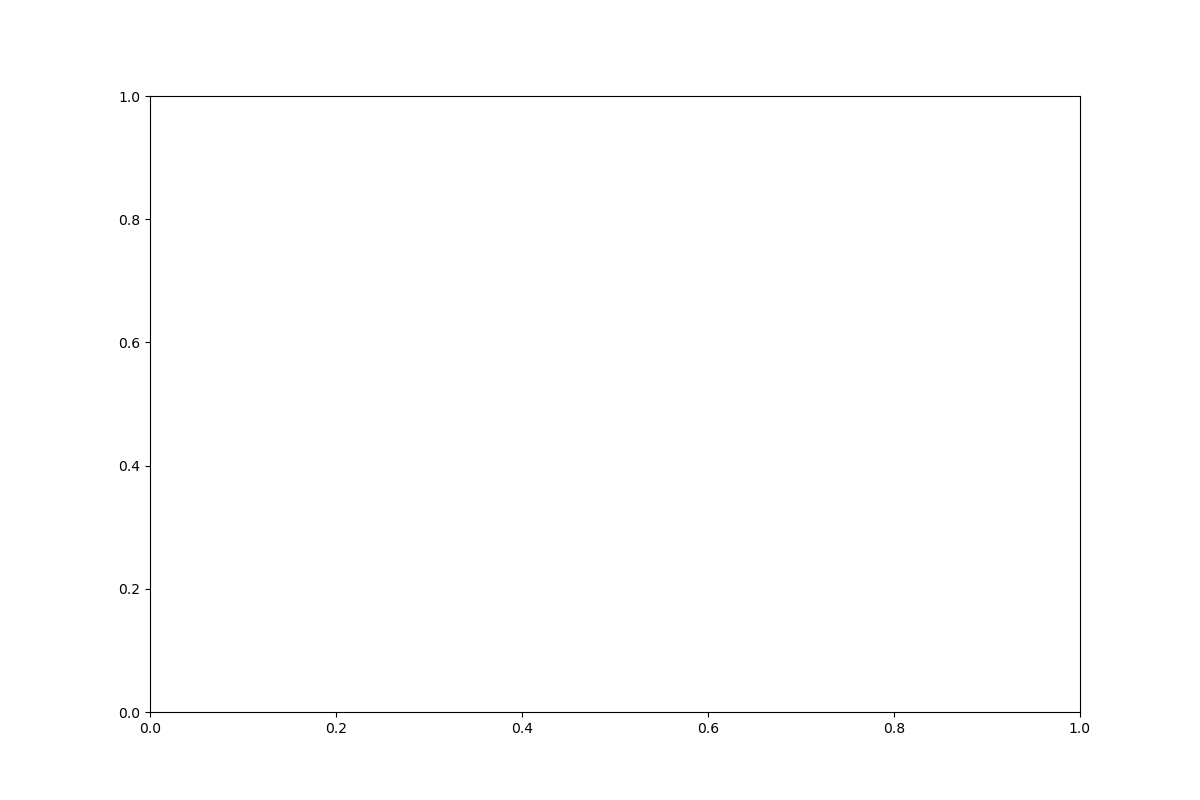

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming you already have the data
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Define a colormap with the desired gradient
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_gradient', 
    ['#00008B', '#0000FF', '#800080', '#FF0000', '#8B0000'],  # Dark Blue to Dark Red
    N=256
)

# Normalize declination values to the range [0, 1] for color mapping
norm = mcolors.Normalize(vmin=0, vmax=90)

# Define different mu values
mu_values = [0.1, 0.5, 1, 2]
alpha = 0.0027  # The alpha level for 3-sigma

# Initialize plot
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each mu value
for mu in mu_values:
    # Initialize lists for uncertainties and declinations
    uncertainties = []
    declinations = []

    # Iterate through all declinations in the northern hemisphere
    for idx in range(len(x_edges) - 1):
        total_counts = np.sum(histogram_2d[idx, :])
        
        if total_counts > 0:
            # Normalize the histogram for the current declination bin
            normalized_histogram = histogram_2d[idx, :] / total_counts
            
            # Compute the cumulative sum of the normalized histogram
            cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
            
            # Find the empirical critical value (TS) for the given alpha level
            empirical_critical_value = find_critical_ts(cumulative_sum_norm_hist, alpha, y_edges[:-1])
            
            # Calculate the number of TS values above the 3-sigma threshold
            N_2 = np.sum(histogram_2d[idx, :] >= empirical_critical_value)
            N = total_counts
            
            # Calculate the uncertainties
            plus_var = np.sqrt(N_2) / N if N_2 > 0 else 0
            minus_var = np.sqrt(N_2) / N if N_2 > 0 else 0
            
            # Calculate lower and upper uncertainties
            lower_uncertainty = empirical_critical_value - minus_var
            upper_uncertainty = empirical_critical_value + plus_var
            total_uncertainty = upper_uncertainty - lower_uncertainty
            
            # Store the uncertainties
            uncertainties.append(total_uncertainty)
            
            # Calculate the mid-point for the declination bin
            declination_midpoint = (x_edges[idx] + x_edges[idx + 1]) / 2
            declinations.append(declination_midpoint)

    # Plot uncertainty vs. declination for the current mu value
    ax.plot(declinations, uncertainties, label=f'mu = {mu}', color=cmap(norm(mu * 10)))

# Finalize the plot
ax.set_xlabel('Declination (degrees)')
ax.set_ylabel('Uncertainty')
ax.set_title('Uncertainty vs Declination for Varying mu Values')
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='Mu Values')
ax.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


